In [94]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

import pandas as pd
import time
import numpy as np
import copy

In [163]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
sectors = []
names = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    name = row.findAll('td')[1].text

    sector = row.findAll('td')[2].text
    
    tickers.append(ticker)
    sectors.append(sector)
    names.append(name)
    


    
tickers = [s.replace('\n', '').replace('.', '-') for s in tickers]
sectors = [s.replace('\n', '') for s in sectors]
names = [s.replace('\n', '') for s in names]


sector_dict = {}
name_dict = {}
for i in range(len(tickers)):
    sector_dict[tickers[i]] = sectors[i]
    name_dict[tickers[i]] = names[i]

    
    



152

In [64]:
i = 0
# NVDA (i=350) does not work for some reason
for t in tickers[:350]:
    print(t)
    
    try:
        mkt_dict[t] = yf.Ticker(t).fast_info['marketCap']
    except:
        print('exception')
        print(i)
        break
    i += 1
    

MMM
AOS
ABT
ABBV
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
AON
APA
AAPL
AMAT
APTV
ACGL
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BALL
BAC
BBWI
BAX
BDX
WRB
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
BG
CHRW
CDNS
CZR
CPT
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CEG
COO
CPRT
GLW
CTVA
CSGP
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISH
DIS
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
ELV
LLY
EMR
ENPH
ETR
EOG
EPAM
EQT
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FICO
FAST
FRT
FDX
FITB
FRC
FSLR
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FOXA
FOX
BEN
FCX
GRMN
IT
GEHC
GEN
GNRC
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HR

In [168]:
shares_dict = {}

550499968

In [171]:
i = 0
# NVDA (i=350) does not work for some reason
for t in tickers[351:]:
    print(t)
    
    try:
        shares_dict[t] = yf.Ticker(t).fast_info['shares']
    except:
        print('exception')
        print(i)
        break
    i += 1

NVR
NXPI
ORLY
OXY
ODFL
OMC
ON
OKE
ORCL
OGN
OTIS
PCAR
PKG
PARA
PH
PAYX
PAYC
PYPL
PNR
PEP
PKI
PFE
PCG
PM
PSX
PNW
PXD
PNC
POOL
PPG
PPL
PFG
PG
PGR
PLD
PRU
PEG
PTC
PSA
PHM
QRVO
PWR
QCOM
DGX
RL
RJF
RTX
O
REG
REGN
RF
RSG
RMD
RHI
ROK
ROL
ROP
ROST
RCL
SPGI
CRM
SBAC
SLB
STX
SEE
SRE
NOW
SHW
SPG
SWKS
SJM
SNA
SEDG
SO
LUV
SWK
SBUX
STT
STLD
STE
SYK
SYF
SNPS
SYY
TMUS
TROW
TTWO
TPR
TRGP
TGT
TEL
TDY
TFX
TER
TSLA
TXN
TXT
TMO
TJX
TSCO
TT
TDG
TRV
TRMB
TFC
TYL
TSN
USB
UDR
ULTA
UNP
UAL
UPS
URI
UNH
UHS
VLO
VTR
VRSN
VRSK
VZ
VRTX
VFC
VTRS
VICI
V
VMC
WAB
WBA
WMT
WBD
WM
WAT
WEC
WFC
WELL
WST
WDC
WRK
WY
WHR
WMB
WTW
GWW
WYNN
XEL
XYL
YUM
ZBRA
ZBH
ZION
ZTS


In [172]:
mkt_dict['NVDA'] = 639.73 * (10**9)
shares_dict['NVDA'] = 2_483_000_000

In [173]:
ticker_stats = pd.DataFrame({
    'symbol': [t for t in tickers],
    'name': [name_dict[t] for t in tickers],
    'sector': [sector_dict[t] for t in tickers],
    'marketCap': [mkt_dict[t] for t in tickers],
    'shares': [shares_dict[t] for t in tickers],
    'logo': [f'https://g.foolcdn.com/art/companylogos/mark/{t}.png' for t in tickers]
             })


In [70]:
big_df = yf.Ticker('MMM').history(period='1y', interval='1d').reset_index()
big_df['ticker'] = ['MMM' for i in range(big_df.shape[0])]

In [71]:
i = 0
for t in tickers[1:]:
    print(t)
    try:
        tick_df = yf.Ticker(t).history(period='1y', interval='1d').reset_index()
        tick_df['ticker'] = [t for i in range(tick_df.shape[0])] 
        big_df = pd.concat([big_df, tick_df])
    except:
        print('exception')
        print(i)
    i += 1
    

AOS
ABT
ABBV
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
AON
APA
AAPL
AMAT
APTV
ACGL
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BALL
BAC
BBWI
BAX
BDX
WRB
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
BG
CHRW
CDNS
CZR
CPT
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CEG
COO
CPRT
GLW
CTVA
CSGP
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISH
DIS
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
ELV
LLY
EMR
ENPH
ETR
EOG
EPAM
EQT
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FICO
FAST
FRT
FDX
FITB
FRC
FSLR
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FOXA
FOX
BEN
FCX
GRMN
IT
GEHC
GEN
GNRC
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HS

In [204]:
tickers.remove('GEHC')
big_df = big_df[big_df['ticker'] != 'GEHC']
big_df.shape

ValueError: list.remove(x): x not in list

In [99]:
corr_df = pd.DataFrame(columns=['stock1', 'stock2', 'r'])
tickers_r = copy.deepcopy(tickers)
while tickers_r:
    t1 = tickers_r[0]
    t1_prices = big_df[big_df['ticker'] == t1]['Close']
    di ={'stock1': [], 'stock2': [], 'r':[]}
    tickers_r.remove(t1)
    print(len(tickers_r))
    for t2 in tickers_r:
        t2_prices = big_df[big_df['ticker'] == t2]['Close']
        r = np.corrcoef(t1_prices, t2_prices)[0, 1]
        di['stock1'] += [t1]
        di['stock2'] += [t2]
        di['r'] += [r]
    
    corr_df = pd.concat([corr_df, pd.DataFrame(di)])
        
        

501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
485
484
483
482
481
480
479
478
477
476
475
474
473
472
471
470
469
468
467
466
465
464
463
462
461
460
459
458
457
456
455
454
453
452
451
450
449
448
447
446
445
444
443
442
441
440
439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424
423
422
421
420
419
418
417
416
415
414
413
412
411
410
409
408
407
406
405
404
403
402
401
400
399
398
397
396
395
394
393
392
391
390
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363
362
361
360
359
358
357
356
355
354
353
352
351
350
349
348
347
346
345
344
343
342
341
340
339
338
337
336
335
334
333
332
331
330
329
328
327
326
325
324
323
322
321
320
319
318
317
316
315
314
313
312
311
310
309
308
307
306
305
304
303
302
301
300
299
298
297
296
295
294
293
292
291
290
289
288
287
286
285
284
283
282
281
280
279
278
277
276
275
274
273
272
271
270
269
268
267
266
265
264
263
262
261
260
259
258
257
256
255
254
253
252


<AxesSubplot:>

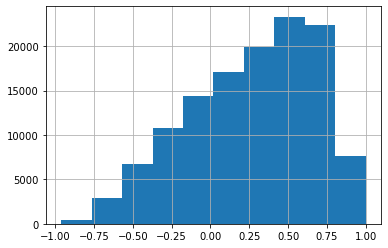

In [84]:
tickers_r

['ABT',
 'ACN',
 'ADM',
 'ADP',
 'AES',
 'A',
 'AKAM',
 'ALB',
 'ALGN',
 'LNT',
 'GOOGL',
 'MO',
 'AMCR',
 'AEE',
 'AEP',
 'AIG',
 'AWK',
 'ABC',
 'AMGN',
 'ADI',
 'AON',
 'AAPL',
 'APTV',
 'ANET',
 'AIZ',
 'ATO',
 'AZO',
 'AVY',
 'BALL',
 'BBWI',
 'BDX',
 'BRK-B',
 'BIO',
 'BIIB',
 'BK',
 'BKNG',
 'BXP',
 'BMY',
 'BR',
 'BF-B',
 'CHRW',
 'CZR',
 'CPB',
 'CAH',
 'CCL',
 'CTLT',
 'CBOE',
 'CDW',
 'CNC',
 'CDAY',
 'CRL',
 'CHTR',
 'CMG',
 'CHD',
 'CINF',
 'CSCO',
 'CFG',
 'CME',
 'KO',
 'CL',
 'CMA',
 'COP',
 'STZ',
 'COO',
 'GLW',
 'CSGP',
 'CTRA',
 'CSX',
 'CVS',
 'DHR',
 'DVA',
 'DAL',
 'DVN',
 'FANG',
 'DFS',
 'DIS',
 'DLTR',
 'DPZ',
 'DOW',
 'DUK',
 'DXC',
 'ETN',
 'ECL',
 'EW',
 'ELV',
 'EMR',
 'ETR',
 'EPAM',
 'EFX',
 'EQR',
 'EL',
 'RE',
 'ES',
 'EXPE',
 'EXR',
 'FFIV',
 'FICO',
 'FRT',
 'FITB',
 'FSLR',
 'FIS',
 'FLT',
 'F',
 'FTV',
 'FOX',
 'FCX',
 'IT',
 'GNRC',
 'GE',
 'GM',
 'GILD',
 'GPN',
 'HAL',
 'HAS',
 'PEAK',
 'HSY',
 'HPE',
 'HOLX',
 'HON',
 'HST',
 'HPQ',
 'HBAN',
 '

In [ ]:
# construct a short

In [122]:
corr_df[corr_df['r'] > 0.89]['stock1'].nunique()

284

In [88]:
np.corrcoef([1,2, 3, 45], [5, 6, 67, 8])[0, 1]

-0.2645995839209883

In [93]:
list(tickers)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA'

In [108]:
big_df.reset_index.rename?

Object `big_df.reset_index.rename` not found.


In [181]:
big_df = big_df.reset_index().rename({'index': 'date_idx'}, axis=1)

In [182]:
big_df['DateStr'] = big_df['Date'].astype(str).str[:10]

In [123]:
# shortlist
corr_df[corr_df['r'] > 0.89]['stock1'].nunique()

284

In [193]:
ticker_stats['marketCap'].describe()

count    5.030000e+02
mean     7.335866e+10
std      1.861194e+11
min      3.375127e+09
25%      1.611598e+10
50%      2.982438e+10
75%      5.805126e+10
max      2.503226e+12
Name: marketCap, dtype: float64

In [196]:
shortlist = list(ticker_stats[ticker_stats['marketCap'] > 9.814122 * (10 **10)]['symbol'])
shortlist

['ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AXP',
 'AMGN',
 'AAPL',
 'AMAT',
 'T',
 'BAC',
 'BRK-B',
 'BA',
 'BMY',
 'AVGO',
 'CAT',
 'SCHW',
 'CVX',
 'CSCO',
 'KO',
 'CMCSA',
 'COP',
 'COST',
 'CVS',
 'DHR',
 'DE',
 'DIS',
 'ELV',
 'LLY',
 'XOM',
 'GE',
 'GILD',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'INTU',
 'JNJ',
 'JPM',
 'LIN',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDT',
 'MRK',
 'META',
 'MSFT',
 'MS',
 'NFLX',
 'NEE',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PM',
 'PG',
 'PLD',
 'QCOM',
 'RTX',
 'SPGI',
 'CRM',
 'SBUX',
 'SYK',
 'TMUS',
 'TSLA',
 'TXN',
 'TMO',
 'UNP',
 'UPS',
 'UNH',
 'VZ',
 'V',
 'WMT',
 'WFC']

In [197]:
links = corr_df[(corr_df['stock1'].isin(shortlist)) & (corr_df['stock2'].isin(shortlist)) & (corr_df['r'] > 0.7)]
# can try different ones too


In [198]:
# create dict out of ticker stats
ticker_dict = ticker_stats.set_index('symbol').to_dict(orient='index')

In [199]:
# construct node-link json:
# nodes list
nodes = []
sl = list(set(list(links['stock1'].unique()) + list(links['stock2'].unique())))
sl_idx = {}
for i in range(len(sl)):
    t = sl[i]
    sl_idx[t] = i
    nodes.append({
        'id': i,
        'marketCap': ticker_dict[t]['marketCap'],
        'ticker': t,
        'name': ticker_dict[t]['name'],
        'logo': ticker_dict[t]['logo'],
        'sector': ticker_dict[t]['sector']
    })
    

In [200]:
# edges list:
edges = []
for i in range(links.shape[0]):
    row = links.iloc[i]
    edges.append({
        'source': sl_idx[row['stock1']],
        'target': sl_idx[row['stock2']],
        'r': row['r']
    })
edges

[{'source': 3, 'target': 30, 'r': 0.7275656496860969},
 {'source': 3, 'target': 43, 'r': 0.7664126385266598},
 {'source': 3, 'target': 38, 'r': 0.7395813689111101},
 {'source': 3, 'target': 15, 'r': 0.855674113862505},
 {'source': 3, 'target': 23, 'r': 0.7273009155005077},
 {'source': 3, 'target': 67, 'r': 0.7439045902899936},
 {'source': 3, 'target': 33, 'r': 0.7426791786252176},
 {'source': 3, 'target': 53, 'r': 0.7777215056112582},
 {'source': 3, 'target': 74, 'r': 0.755630426316375},
 {'source': 3, 'target': 37, 'r': 0.7143135895911518},
 {'source': 3, 'target': 71, 'r': 0.7076687796345935},
 {'source': 17, 'target': 26, 'r': 0.7309868298624855},
 {'source': 30, 'target': 43, 'r': 0.8201987719423977},
 {'source': 30, 'target': 55, 'r': 0.7978274529037698},
 {'source': 30, 'target': 25, 'r': 0.7953541679817674},
 {'source': 30, 'target': 56, 'r': 0.7538660518618365},
 {'source': 30, 'target': 65, 'r': 0.7315634412722816},
 {'source': 30, 'target': 62, 'r': 0.7448689641823425},
 {'so

In [201]:
ticker_dict

{'MMM': {'name': '3M',
  'sector': 'Industrials',
  'marketCap': 57422650318.08594,
  'shares': 550499968,
  'logo': 'https://g.foolcdn.com/art/companylogos/mark/MMM.png'},
 'AOS': {'name': 'A. O. Smith',
  'sector': 'Industrials',
  'marketCap': 10319352807.677246,
  'shares': 150915008,
  'logo': 'https://g.foolcdn.com/art/companylogos/mark/AOS.png'},
 'ABT': {'name': 'Abbott',
  'sector': 'Health Care',
  'marketCap': 173634112670.5537,
  'shares': 1737949952,
  'logo': 'https://g.foolcdn.com/art/companylogos/mark/ABT.png'},
 'ABBV': {'name': 'AbbVie',
  'sector': 'Health Care',
  'marketCap': 278173038606.09375,
  'shares': 1781789952,
  'logo': 'https://g.foolcdn.com/art/companylogos/mark/ABBV.png'},
 'ACN': {'name': 'Accenture',
  'sector': 'Information Technology',
  'marketCap': 161028403405.03125,
  'shares': 637609984,
  'logo': 'https://g.foolcdn.com/art/companylogos/mark/ACN.png'},
 'ATVI': {'name': 'Activision Blizzard',
  'sector': 'Communication Services',
  'marketCap':

In [190]:
# calc market cap of every instance
def mkcap(x):
    t = x['ticker']
    shares = ticker_dict[t]['shares']
    return shares * x['Close']
    

big_df['curMarketCap'] = big_df.apply(mkcap, axis=1)

In [209]:
ticker_dict['GEHC'] = None

In [178]:
# convert to csv, json
import json

In [210]:
with open('ticker_stats.json', 'w') as outfile:
    json.dump(ticker_dict, outfile)
    
with open('corr.json', 'w') as outfile:
    json.dump({'nodes': nodes, 'edges': edges}, outfile)

In [206]:
big_df.to_csv('prices.csv')

In [207]:
big_df

,date_idx,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,DateStr,curMarketCap
0,0,2022-03-21 00:00:00-04:00,142.138769,143.142509,140.905598,142.033615,4514900,0.0,0.0,MMM,2022-03-21,7.818950e+10
1,1,2022-03-22 00:00:00-04:00,142.865263,144.194020,141.957123,143.333679,4252000,0.0,0.0,MMM,2022-03-22,7.890519e+10
2,2,2022-03-23 00:00:00-04:00,143.094698,143.180729,141.058540,141.173248,2637200,0.0,0.0,MMM,2022-03-23,7.771587e+10
3,3,2022-03-24 00:00:00-04:00,141.593861,142.654955,140.905583,142.415970,2028100,0.0,0.0,MMM,2022-03-24,7.839999e+10
4,4,2022-03-25 00:00:00-04:00,142.693194,144.519028,142.349055,143.830765,2247800,0.0,0.0,MMM,2022-03-25,7.917883e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
125997,246,2023-03-14 00:00:00-04:00,165.960007,166.860001,162.470001,164.559998,1911300,0.0,0.0,ZTS,2023-03-14,7.710804e+10
125998,247,2023-03-15 00:00:00-04:00,162.000000,163.679993,160.119995,163.570007,1824100,0.0,0.0,ZTS,2023-03-15,7.664416e+10
125999,248,2023-03-16 00:00:00-04:00,162.509995,166.839996,162.250000,166.309998,2040500,0.0,0.0,ZTS,2023-03-16,7.792804e+10
126000,249,2023-03-17 00:00:00-04:00,167.289993,168.389999,163.649994,164.470001,3605100,0.0,0.0,ZTS,2023-03-17,7.706587e+10
